[Reference](https://medium.com/mlearning-ai/an-alliance-python-and-r-eda-9336e66fc65c)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering

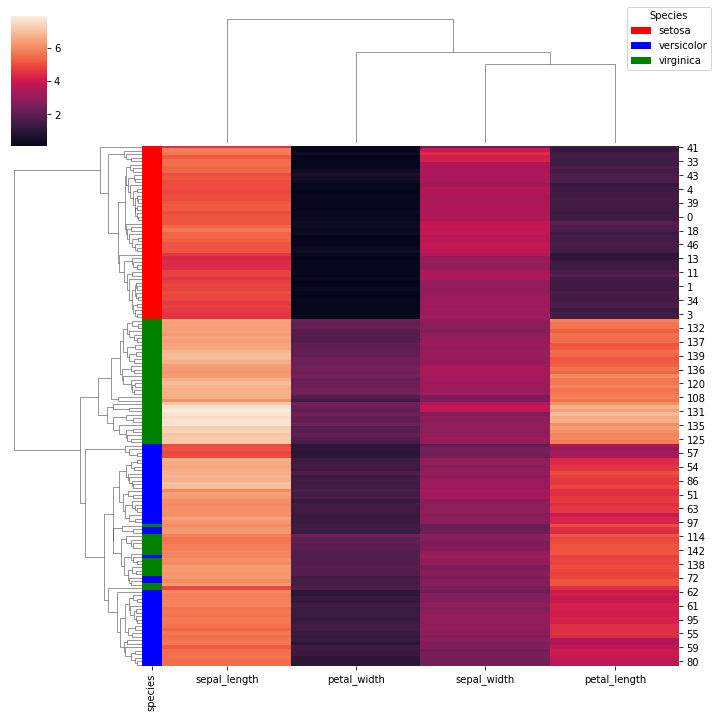

In [16]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
clust = dict(zip(species.unique(), "rbg"))
row_colors = species.map(clust)
g = sns.clustermap(iris, row_colors=row_colors)
#import
from matplotlib.patches import Patch
handles = [Patch(facecolor=clust[name]) for name in clust]
plt.legend(handles, clust, title='Species',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.savefig("clusteriris.svg")

In [17]:
df1 = sns.load_dataset("iris")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Check the null values

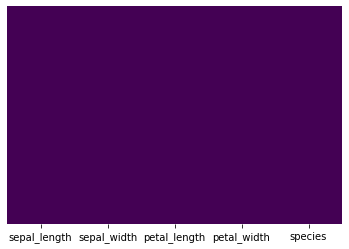

In [18]:
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Descriptive Statistics

In [19]:
df1.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# Data shape

In [20]:
df1.shape

(150, 5)

# Dataset Information

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Duplicates

In [22]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Outliers

In [23]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

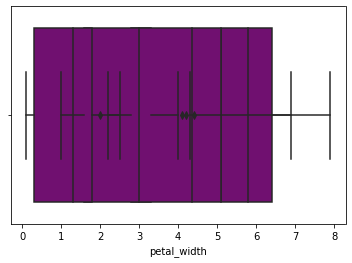

In [24]:
#sepal length
sns.boxplot(df1['sepal_length'], color='purple')
#sepal width
sns.boxplot(df1['sepal_width'], color='purple')
#petal width
sns.boxplot(df1['petal_length'], color='purple')
#petal length
sns.boxplot(df1['petal_width'], color='purple')

# Correlation

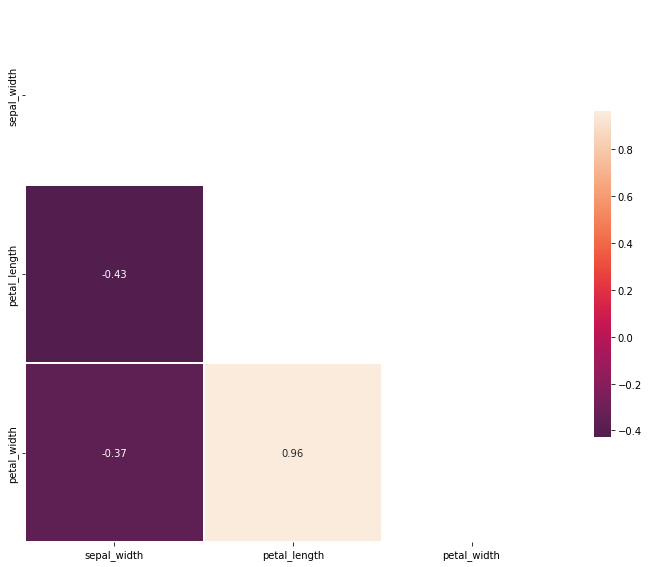

In [25]:
# Calculate the correlation matrix
corr = df1.iloc[:, 1:5].corr(method="pearson")
# Generate a mask for the upper triangle
mask = np.triu(corr)
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt=".2f", center=0.08,cbar_kws={"shrink":0.5}, cmap='rocket')

# Pairplot

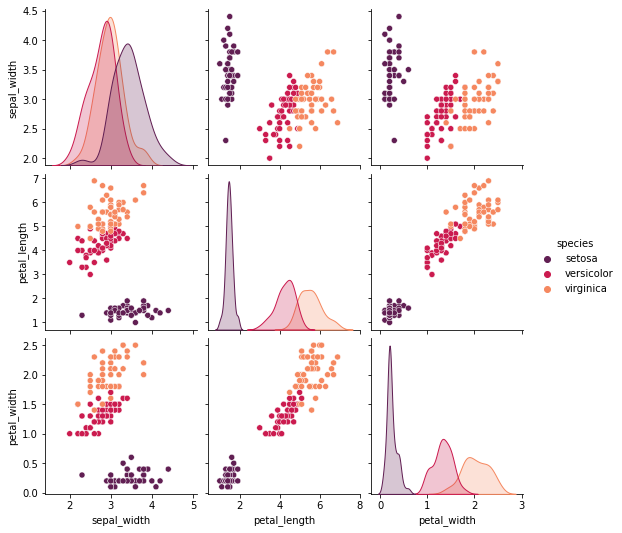

In [26]:
#use pairplot to show the relationship between all variables
pair = df1.iloc[:, 1:6]
sns.pairplot(pair, hue='species', palette='rocket')
plt.savefig("pairplotiris.svg")

# Violin plot

In [27]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

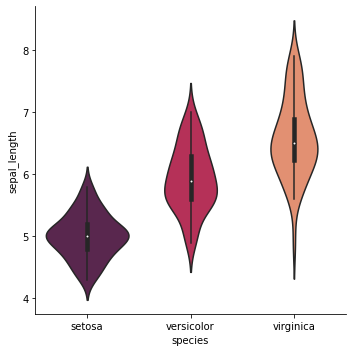

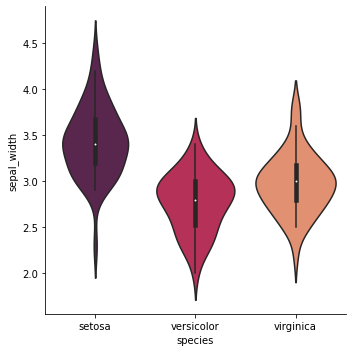

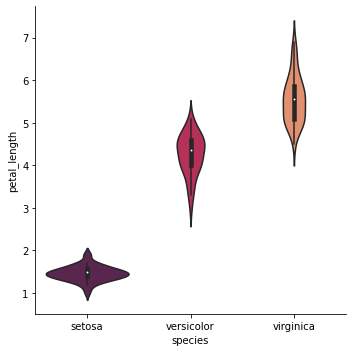

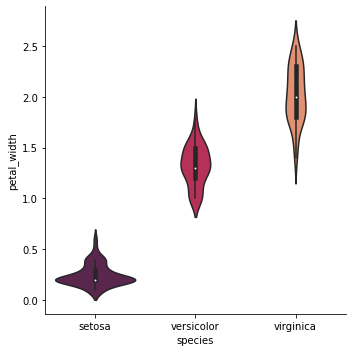

In [28]:
#Sepallength
sns.catplot(x='species', y='sepal_length', kind='violin', data=df1, palette='rocket')
#Sepal Width
sns.catplot(x='species', y='sepal_width', kind='violin', data=df1, palette='rocket')
#Petal length
sns.catplot(x='species', y='petal_length', kind='violin', data=df1, palette='rocket')
#Petal width
sns.catplot(x='species', y='petal_width', kind='violin', data=df1, palette='rocket')